In [4]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!unzip fruits.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


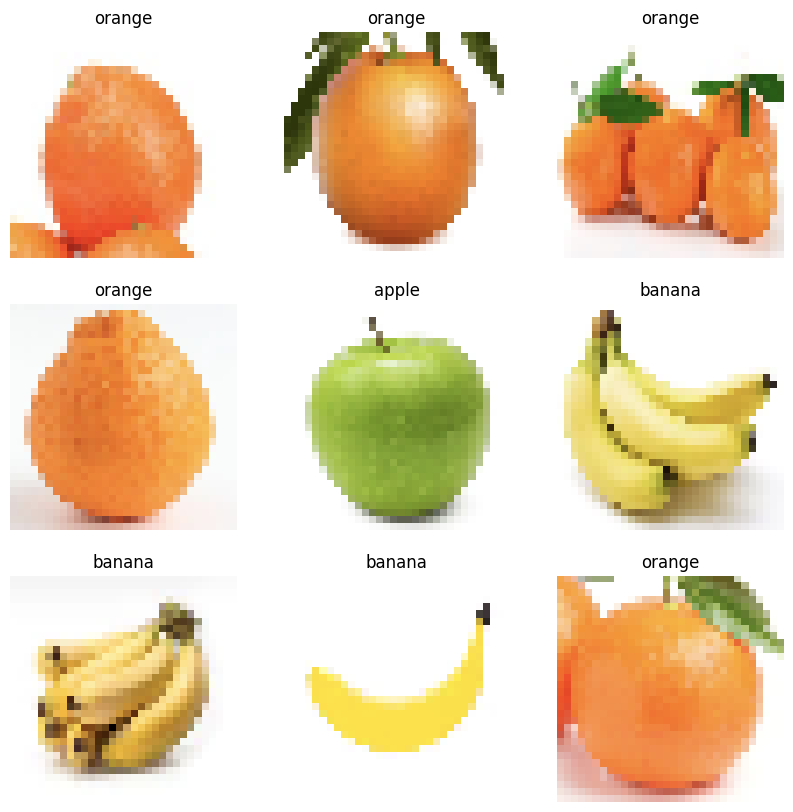

In [9]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [12]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [13]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4725 - loss: 1.0607 - val_accuracy: 0.4848 - val_loss: 0.8792
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7113 - loss: 0.7148 - val_accuracy: 0.7727 - val_loss: 0.5743
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8462 - loss: 0.4275 - val_accuracy: 0.8485 - val_loss: 0.3481
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8755 - loss: 0.3116 - val_accuracy: 0.7424 - val_loss: 0.5320
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9328 - loss: 0.1826 - val_accuracy: 0.9242 - val_loss: 0.2215
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9338 - loss: 0.1841 - val_accuracy: 0.9242 - val_loss: 0.1562
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9508 - loss: 0.1327 - val_accuracy: 0.9545 - val_loss: 0.1338
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9777 - loss: 0.0890 - val_accuracy: 0.9091 - val_loss: 0.

In [14]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9483 - loss: 0.2494


[0.21855026483535767, 0.9461538195610046]

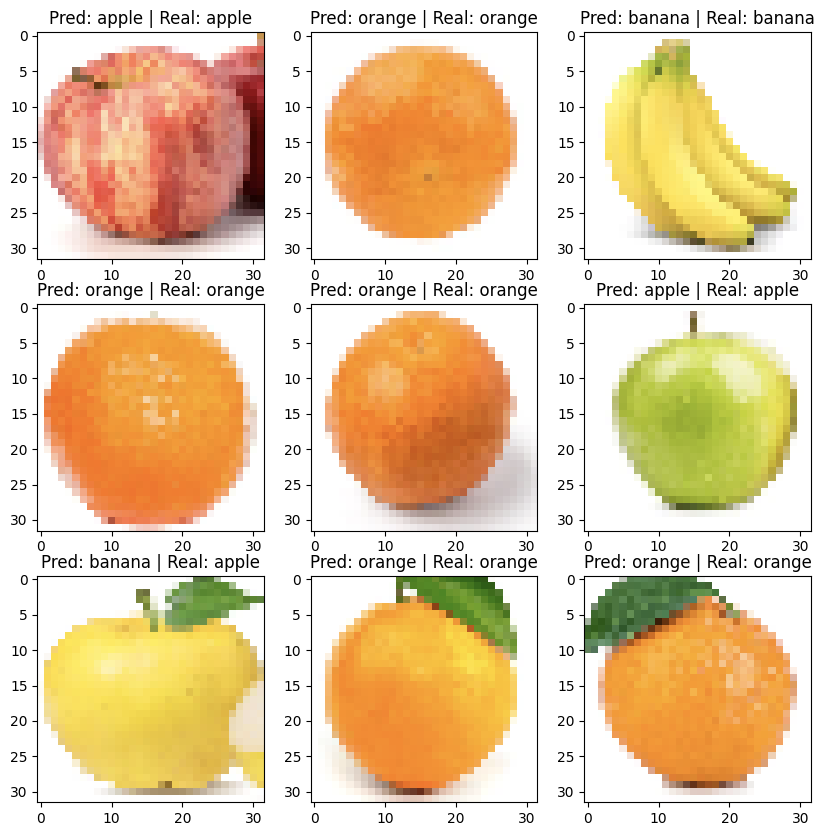

In [15]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\knigh\AppData\Local\Temp\tmpo7v6lg58\assets


INFO:tensorflow:Assets written to: C:\Users\knigh\AppData\Local\Temp\tmpo7v6lg58\assets


Saved artifact at 'C:\Users\knigh\AppData\Local\Temp\tmpo7v6lg58'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2045269792080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269794000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269792272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269795152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045243059152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269795344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269795728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269796496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269797072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2045269797840: TensorSpec(shape=(), dtype=tf.resource, name=None)
